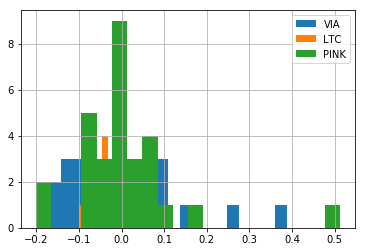

(:


In [14]:
""" plot a histogram"""

import pandas as pd
import matplotlib.pyplot as plt


def make_histogram():
    dates = pd.date_range('2017-08-03', '2017-08-31')
    
    currencies = ['BTC_VIA', 'BTC_LTC', 'BTC_PINK']
    
    df = get_data(currencies, dates)
    
    daily_returns = compute_daily_return(df)
    
    daily_returns['BTC_VIA'].hist(bins=20, label='VIA')
    daily_returns['BTC_LTC'].hist(bins=20, label='LTC')
    daily_returns['BTC_PINK'].hist(bins=20, label='PINK')
    plt.legend(loc='upper right')
    plt.show()
    
    return None


def get_data(currencies, dates):
    df1 = pd.DataFrame(index=dates)
    for currency in currencies:
        df_currency = pd.read_csv('data/{}.csv'.format(currency), index_col="date", parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_currency = df_currency.rename(columns={'close': currency})
        df1 = df1.join(df_currency)
    return df1
    
def plot_data(df, title='prices', ylabel='Price'):
    ax = df.plot(title=title, fontsize=2)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_return(df):
    daily_returns = (df/ df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns
    
    
if __name__ == "__main__":
    make_histogram()
    print('(:')
    